## Introduction

In [60]:
import pandas as pd

data1 = pd.read_csv('C:/Users/prana/OneDrive/Desktop/4trimester/healthcare/data/healthcare-dataset-stroke-data.csv')
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
data = data1.drop(['id'], axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# data_obj_to_cat = data.select_dtypes(include='object').astype('category')

# Now combine with scaled numeric data
# num = data.select_dtypes(include=np.number)
# scale = StandardScaler()
# numd = scale.fit_transform(num)
# num_df = pd.DataFrame(numd, columns=num.columns, index=data.index)

# # Final merge
# data = pd.concat([num_df, data_obj_to_cat], axis=1)

# data = pd.concat([data, data1['age']], axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [64]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [65]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [66]:

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

In [67]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Exploratory Data Analysis (EDA)

#### Univariate Analysis

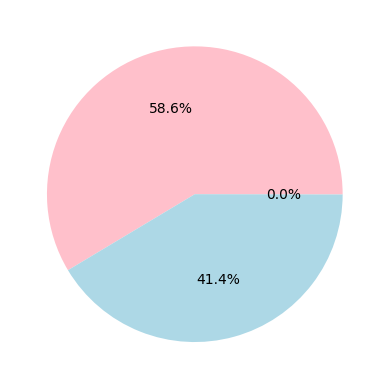

In [69]:
plt.pie(data['gender'].value_counts(), 
        autopct='%.1f%%', 
        # labels=['Female', 'Male'], 
        colors= ['pink' ,'lightblue']
        )
plt.show()

<Axes: xlabel='age', ylabel='Count'>

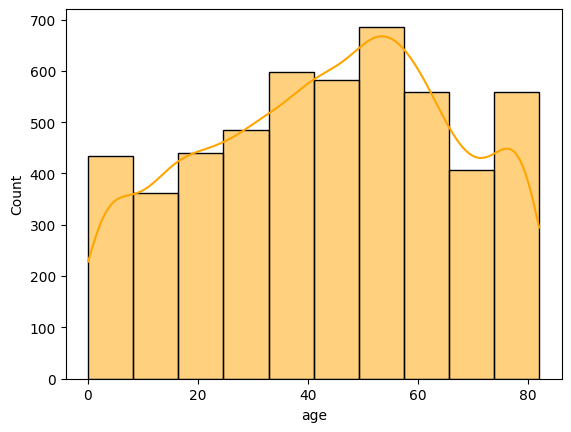

In [70]:
sns.histplot(data['age'], bins =10, kde = True, color = 'orange')

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

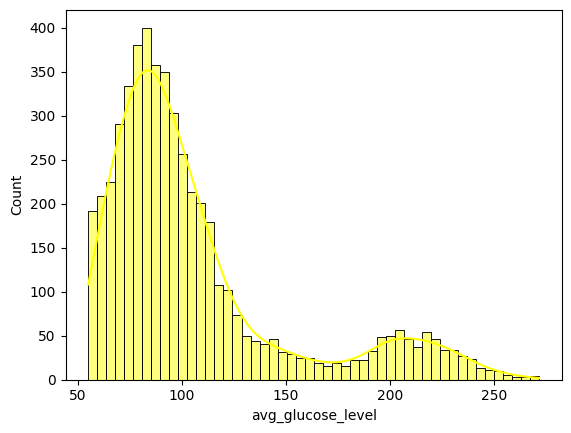

In [71]:
sns.histplot(data['avg_glucose_level'], kde = True, bins = 50, color='yellow')

In [72]:
d = data['Residence_type'].value_counts()
d


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

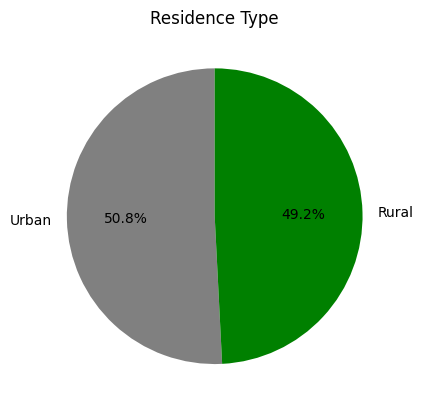

In [73]:
plt.pie(data['Residence_type'].value_counts(), autopct = '%.1f%%', 
        labels=['Urban', 'Rural'], startangle=90, 
        colors=['grey', 'green'], )
plt.title('Residence Type')
plt.show()

In [74]:
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2186257a750>,
 [Text(-0.9702527881001013, -0.5182755321100737, 'Yes'),
  Text(0.9702527395756395, 0.5182756229516938, 'No')],
 [Text(-0.5292287935091461, -0.2826957447873129, '65.6%'),
  Text(0.5292287670412579, 0.28269579433728753, '34.4%')])

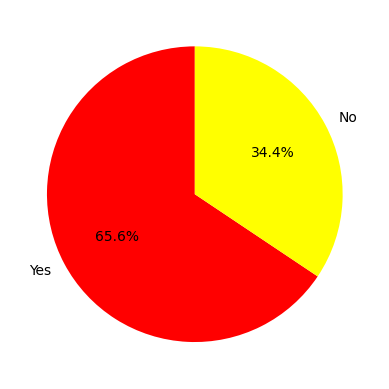

In [75]:
plt.pie(data['ever_married'].value_counts(), autopct = '%.1f%%', labels=['Yes', 'No'], startangle= 90, colors=['red', 'yellow'] )

([<matplotlib.patches.Wedge at 0x218625b3b10>,
 [Text(-1.0842021913429936, 0.18575685259782707, ''),
  Text(1.0842021804731095, -0.1857569160417862, '')],
 [Text(-0.5913830134598146, 0.10132191959881474, '94.6%'),
  Text(0.5913830075307869, -0.10132195420461064, '5.4%')])

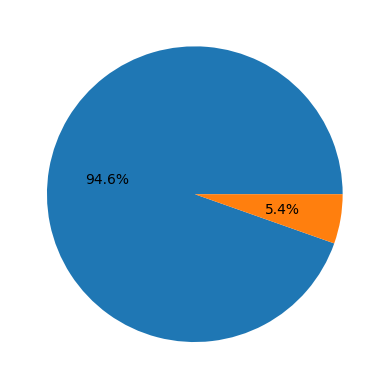

In [76]:
plt.pie(data['heart_disease'].value_counts(), autopct='%.1f%%')

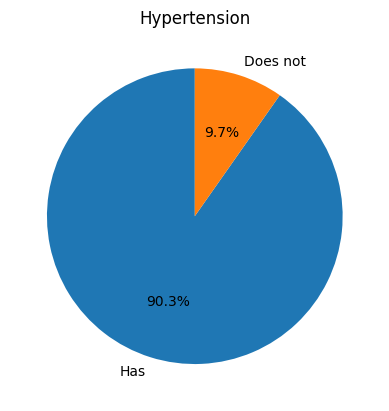

In [77]:
plt.pie(data['hypertension'].value_counts(), 
        labels=['Has', 'Does not'], 
        autopct= '%.1f%%', startangle=90
        )
plt.title('Hypertension')
plt.show()

In [78]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

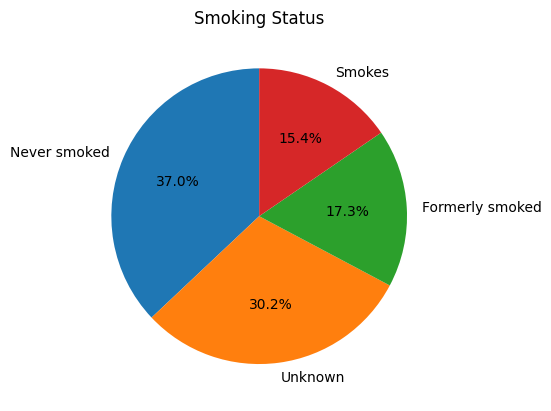

In [79]:
plt.pie(data['smoking_status'].value_counts(), autopct='%.1f%%',startangle=90, labels=['Never smoked','Unknown','Formerly smoked','Smokes'])
plt.title('Smoking Status')
plt.show()

In [80]:
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

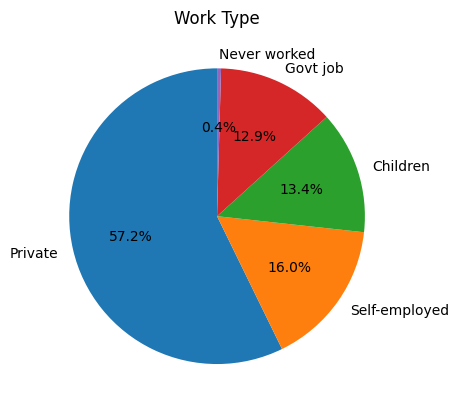

In [81]:
plt.pie(data['work_type'].value_counts(), labels=['Private','Self-employed','Children','Govt job','Never worked'], startangle=90, autopct='%.1f%%')
plt.title('Work Type')
plt.show()

<Axes: xlabel='bmi', ylabel='Count'>

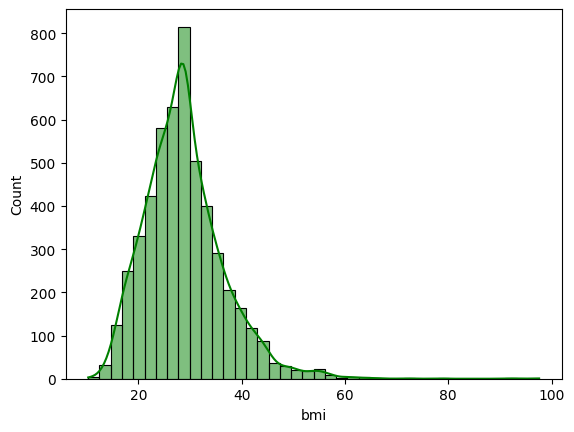

In [82]:
sns.histplot(data['bmi'], bins=40, kde= True, color='g')

#### Bivariate Analysis

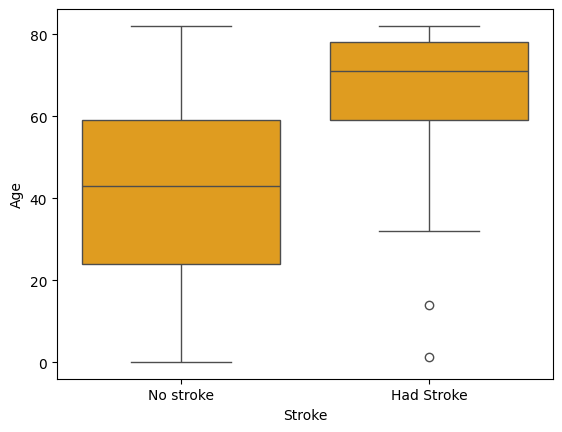

In [83]:
sns.boxplot(x= data['stroke'], y = data['age'], color='orange')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.xticks([0,1], ['No stroke', 'Had Stroke'])
plt.show()

([<matplotlib.axis.XTick at 0x2186021f950>,
 [Text(0, 0, 'No stroke'), Text(1, 0, 'Had Stroke')])

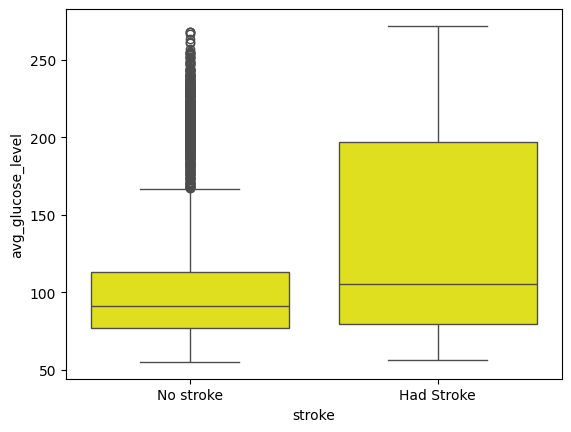

In [84]:
sns.boxplot(x= data['stroke'], y= data['avg_glucose_level'], color='yellow')
plt.xticks([0,1], ['No stroke', 'Had Stroke'])

([<matplotlib.axis.XTick at 0x21861291550>,
 [Text(0, 0, 'No stroke'), Text(1, 0, 'Had Stroke')])

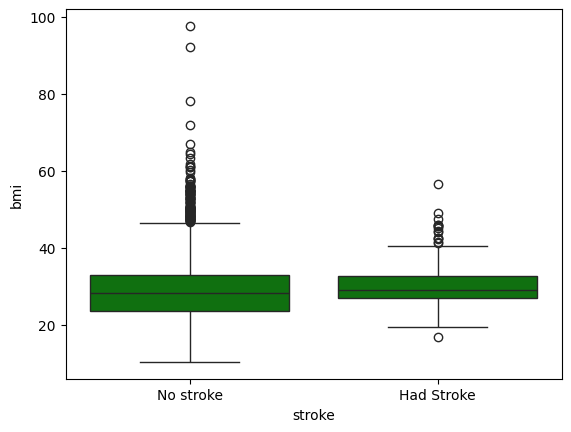

In [85]:
sns.boxplot(x= data['stroke'], y= data['bmi'], color='g')
plt.xticks([0,1], ['No stroke', 'Had Stroke'])

<Axes: xlabel='stroke', ylabel='smoking_status'>

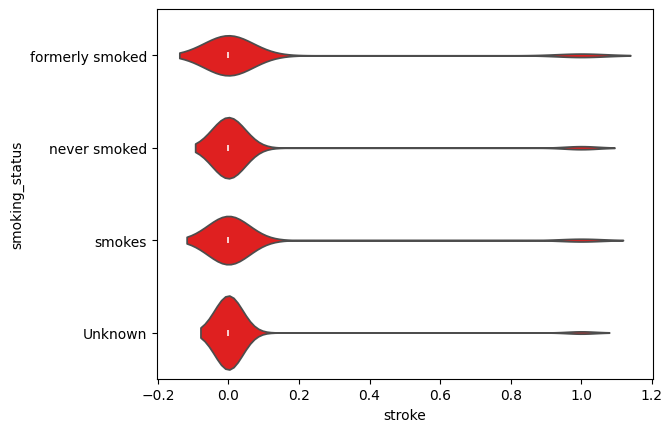

In [86]:
sns.violinplot(x=data['stroke'], y=data['smoking_status'], color='r')

In [87]:
pd.crosstab(data['smoking_status'],data['stroke'])

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [88]:
pd.crosstab(
    data['stroke'], round(data['bmi']), )
# plt.xticks([0,1], ['No stroke', 'Had Stroke'])

bmi,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,...,61.0,62.0,63.0,64.0,65.0,67.0,72.0,78.0,92.0,98.0
stroke,,,,,,,,,,,,,,,,,,,,,
0,1,1,3,5,23,30,72,87,126,108,...,3,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
import numpy as np
datan = data.select_dtypes(include=np.number)

In [90]:
# datan = datan.drop('id', axis=1)
datan.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

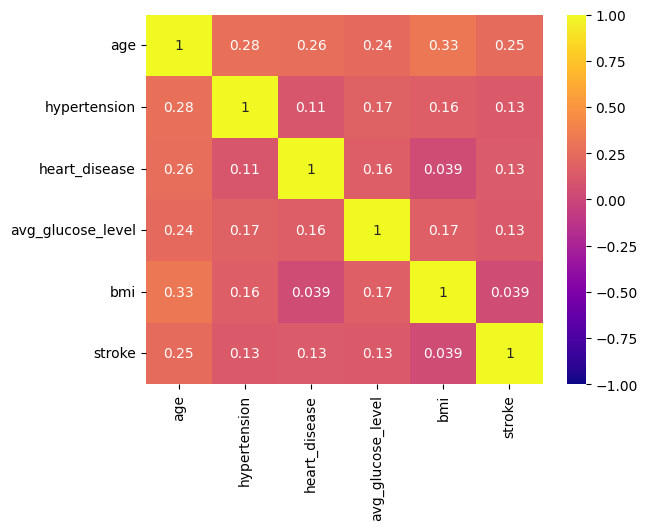

In [91]:
sns.heatmap(datan.corr(), cmap='plasma', vmax=1, vmin=-1,annot=True)

In [92]:
datan.shape[1] - data.shape[1]

-5

## Modeling and Evaluation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# If y is categorical, encode it
le = LabelEncoder()

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42,stratify=y)

# Train logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [95]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

[[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\prana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\prana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\prana\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Baseline Result: As expected, the model has a 95% accuracy, but this is meaningless. The `recall` for class 1 (`Stroke`) is 0.00, and the `F1-score` is 0.00. The model did not predict a single stroke case correctly.

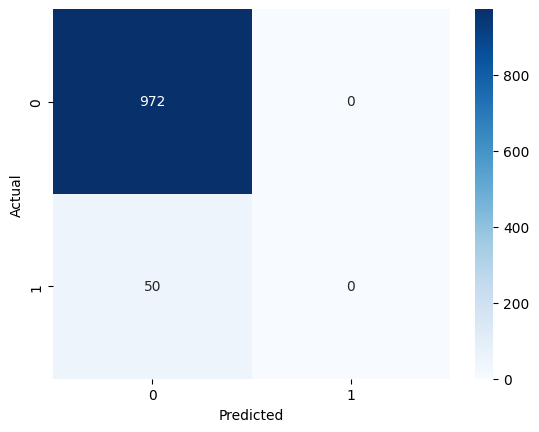

In [96]:
# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




--- Weighted Logistic Regression Results ---
Accuracy: 0.7456

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



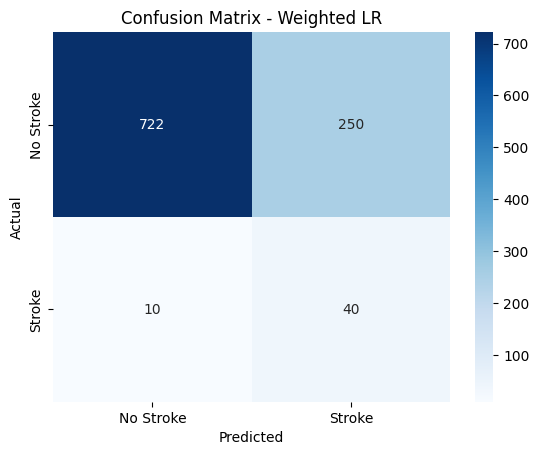

In [98]:
# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Identify feature types
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Create the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Create the pipeline with class_weight='balanced'
lr_weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Train the model
lr_weighted_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr_weighted = lr_weighted_pipeline.predict(X_test)

print("--- Weighted Logistic Regression Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_weighted):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr_weighted))

# Plot Confusion Matrix
cm_lr_weighted = confusion_matrix(y_test, y_pred_lr_weighted)
sns.heatmap(cm_lr_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Weighted LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Weighted LR Result: This is much better!

Accuracy dropped to 75% (which is fine).

Recall for Class 1 jumped from 0.00 to 0.80 (it found 80% of the stroke cases).

Precision for Class 1 is low (0.14), meaning it has many false positives, but it is no longer failing to identify any positive cases. The F1-score is now 0.24.

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# --- 2. Define Features (X) and Target (y) ---
X = data.drop('stroke', axis=1)
y = data['stroke']
print(f"Target variable distribution:\n{y.value_counts(normalize=True)}")

# --- 3. Identify Feature Types ---
numerical_features = X.select_dtypes(include=np.number).columns
# Handle potential 'object' type numericals if needed, e.g., if 'bmi' is object
# Identify true categorical features (excluding binary encoded ones if already done)
categorical_features = X.select_dtypes(exclude=np.number).columns

print(f"\nNumerical features: {list(numerical_features)}")
print(f"Categorical features: {list(categorical_features)}")

Target variable distribution:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

Numerical features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
Categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [100]:
# --- 4. Create Preprocessing Pipelines ---
# Pipeline for numerical features: impute missing with median, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Use sparse_output=False for dense array
])

# --- 5. Combine Preprocessing Steps ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


In [101]:

# --- 6. Handle Class Imbalance ---
# Calculate the ratio for scale_pos_weight
count_neg, count_pos = y.value_counts().sort_index()
scale_pos_weight_value = count_neg / count_pos
print(f"\nCalculated scale_pos_weight for XGBoost: {scale_pos_weight_value:.2f}")


# --- 7. Create the Full XGBoost Pipeline ---
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False, # Deprecated, set to False
        eval_metric='logloss',    # Common metric for binary classification
        scale_pos_weight=scale_pos_weight_value # Address class imbalance
        ))
])



Calculated scale_pos_weight for XGBoost: 19.52


In [102]:

# --- 8. Train-Test Split ---
# Stratify ensures proportion of target classes is same in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- 9. Train the XGBoost Pipeline ---
print("\n--- Training XGBoost Model ---")
xgb_pipeline.fit(X_train, y_train)

# --- 10. Predict and Evaluate ---
y_pred = xgb_pipeline.predict(X_test)
y_pred_proba = xgb_pipeline.predict_proba(X_test)[:, 1] # Probabilities for ROC AUC

print("\n--- XGBoost Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training set shape: (4088, 10)
Testing set shape: (1022, 10)

--- Training XGBoost Model ---

--- XGBoost Model Evaluation ---
Accuracy: 0.8630
ROC AUC Score: 0.7607

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       972
           1       0.12      0.28      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022



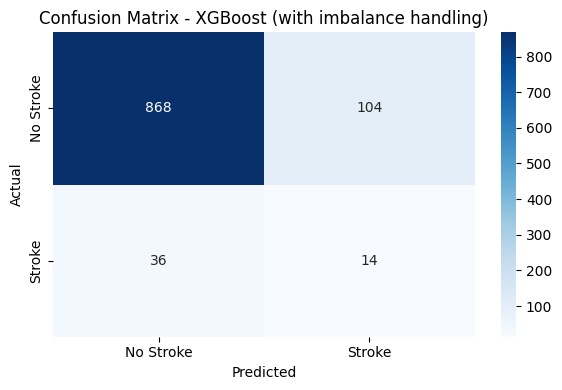

In [103]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - XGBoost (with imbalance handling)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [ ]:
print("\n--- Starting Hyperparameter Tuning for XGBoost (Optional) ---")
param_grid_xgb = {
    'classifier__n_estimators': [50, 100], 
    'classifier__max_depth': [3, 5],      
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],     
    'classifier__colsample_bytree': [0.8, 1.0] 
}

# Use GridSearchCV - focusing on ROC AUC or F1-score is good for imbalance
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=3, 
                               scoring='roc_auc', verbose=2, n_jobs=None) 

grid_search_xgb.fit(X_train, y_train)




In [112]:
print("\nBest parameters found by GridSearchCV: ", grid_search_xgb.best_params_)
print("Best ROC AUC score on cross-validation: ", grid_search_xgb.best_score_)


Best parameters found by GridSearchCV:  {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__subsample': 0.8}
Best ROC AUC score on cross-validation:  nan



--- Tuned XGBoost Model Evaluation ---
Accuracy: 0.5499
ROC AUC Score: 0.8293

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.99      0.53      0.69       972
           1       0.09      0.86      0.16        50

    accuracy                           0.55      1022
   macro avg       0.54      0.70      0.43      1022
weighted avg       0.94      0.55      0.67      1022


Tuned Confusion Matrix plot saved as tuned_xgboost_confusion_matrix.png


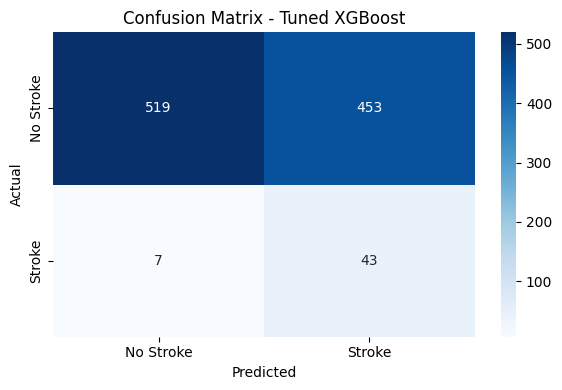

In [113]:

# Evaluate the best model from GridSearch
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_tuned = best_xgb_model.predict(X_test)
y_pred_proba_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned XGBoost Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned))

# Plot Tuned Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('tuned_xgboost_confusion_matrix.png') # Save the plot
#plt.show()
print("\nTuned Confusion Matrix plot saved as tuned_xgboost_confusion_matrix.png")

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Note: We use the Pipeline from imbalanced-learn now
xgb_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Now, fit and evaluate this new pipeline
xgb_pipeline_smote.fit(X_train, y_train)
y_pred_smote = xgb_pipeline_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.18      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.57      0.55      0.56      1022
weighted avg       0.92      0.93      0.92      1022



GBoost + SMOTE Result: This model shows a different trade-off.

Accuracy is high (93%), but we know this isn't the main goal.

Recall for Class 1 is 0.14 (it only found 7 of the 50 stroke cases).

Precision for Class 1 is slightly better at 0.18.

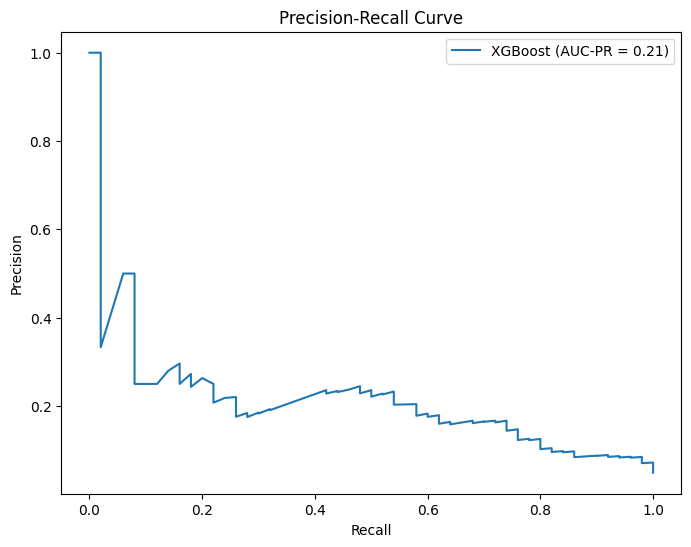

In [115]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get probabilities from your best model (e.g., tuned XGB)
y_pred_proba_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_tuned)
pr_auc = auc(recall, precision)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'XGBoost (AUC-PR = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_25004\1725524658.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='plasma')


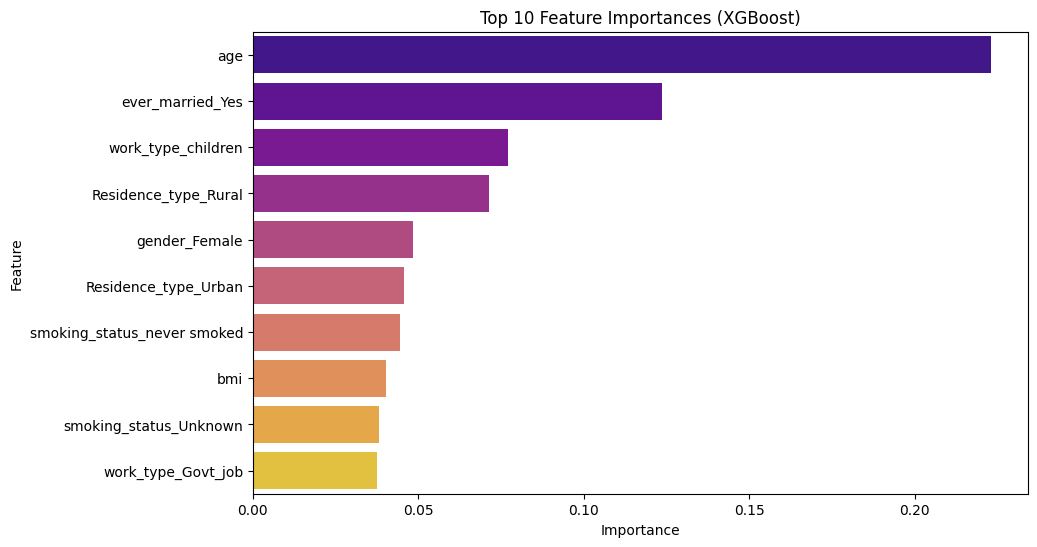

In [116]:
# Get feature names after one-hot encoding
onehot_cols = best_xgb_model.named_steps['preprocessor'].named_transformers_['cat'] \
              .named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = list(numerical_features) + list(onehot_cols)

# Get importances
importances = best_xgb_model.named_steps['classifier'].feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10) # Top 10

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='plasma')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.show()

## Model Interpretation with SHAP

In [120]:
# 1. Get the fitted classifier and preprocessor from the pipeline
# (Assuming 'best_xgb_model' is your final pipeline variable from Cell 167)
classifier = best_xgb_model.named_steps['classifier']
preprocessor = best_xgb_model.named_steps['preprocessor']

# 2. Get feature names (must be run after preprocessor is fitted)
onehot_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(onehot_cols)

# 3. Process X_train (for background) and X_test (for explanations)
# We must use the PREPROCESSOR to transform the data before sending it to the explainer
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Create DataFrames with proper column names (this is crucial for SHAP plots)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# 5. Create the TreeExplainer
# We explain the classifier, and use the processed training data as the background
explainer = shap.TreeExplainer(classifier, X_train_processed_df)

# 6. Calculate SHAP values
# This creates a shap.Explanation object that bundles values + data
shap_values = explainer(X_test_processed_df)

print("SHAP values calculated successfully.")

SHAP values calculated successfully.


In [119]:
# Explain the first patient in the test set
patient_index = 0
base_value = explainer.expected_value
patient_shap_values = shap_values.values[patient_index, :]
patient_features = X_test_processed_df.iloc[patient_index, :]

print(f"--- Explaining Prediction for Patient {patient_index} ---")
shap.force_plot(base_value, patient_shap_values, patient_features)

--- Explaining Prediction for Patient 0 ---


#### Final Prediction 
The model's output value is 1.12. Since this is a positive number (to the right of the base value), the model is correctly predicting a high risk of stroke.

Driving Factors:

Red (Increasing Risk): age (0.8696) and bmi (0.7575) are the two strongest factors pushing the prediction towards "Stroke."

Blue (Decreasing Risk): avg_glucose_level (-0.6207) and hypertension are the main factors lowering the risk for this specific patient.

In short, the model is predicting "Stroke" for this patient primarily because their age and BMI are strong risk factors that outweigh the protective effect of their glucose level and lack of hypertension.

--- Alternative 1: SHAP Summary Bar Plot ---


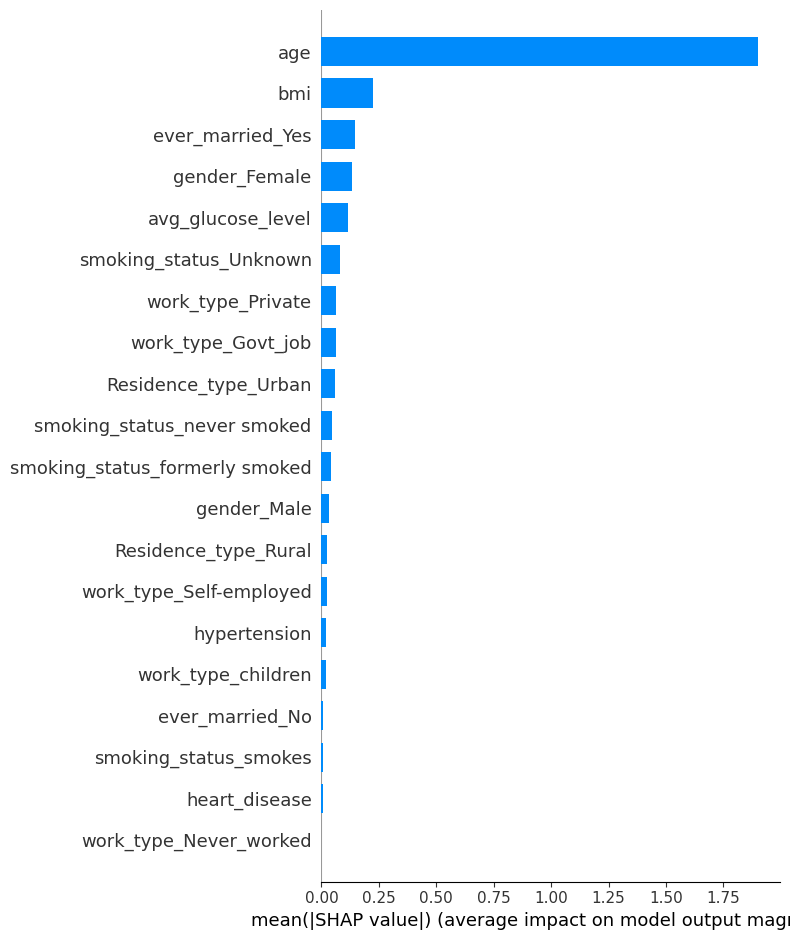

In [122]:
import shap
import matplotlib.pyplot as plt

# Assuming 'shap_values' is your SHAP Explanation object from the explainer
# and 'X_test_processed_df' is your processed test data.

print("--- Alternative 1: SHAP Summary Bar Plot ---")
shap.summary_plot(shap_values, plot_type="bar", feature_names=all_feature_names)
plt.show()

This plot confirms what the beeswarm plot was trying to show, but in a simpler, ranked format.

Clear Importance: age is definitively the most important feature influencing the model's predictions, with an average SHAP value of over 1.75.

Second Tier: bmi is the second most important feature, followed by ever_married_Yes and gender_Female.

Lower Impact: All other features, like avg_glucose_level and various smoking_status categories, have a much smaller (but still present) average impact on the model's output.

--- Alternative 2: SHAP Dependence Plot (for 'age') ---


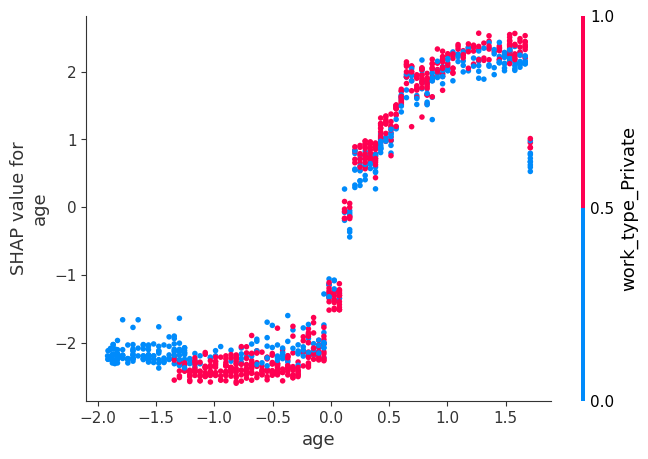

In [123]:
import shap
import matplotlib.pyplot as plt

# Assuming 'shap_values' and 'X_test_processed_df' are available

print("--- Alternative 2: SHAP Dependence Plot (for 'age') ---")

# 'age' = The feature you want to inspect
# shap_values.values = The raw SHAP value matrix
# X_test_processed_df = The data used to generate the values
shap.dependence_plot("age", shap_values.values, X_test_processed_df)
plt.show()

Top Plot (Age vs. work_type_Private):

There is a clear threshold effect. For patients with a scaled age below ~-0.5 (younger), age actively decreases their stroke risk (negative SHAP value).

Once age crosses this threshold, the risk (SHAP value) rises very sharply.

The color-coding for work_type_Private (blue vs. pink) doesn't show a clear vertical separation, meaning the impact of age is strong regardless of whether the person works in the private sector.

--- Dependence Plot (for 'age' with 'bmi' interaction) ---


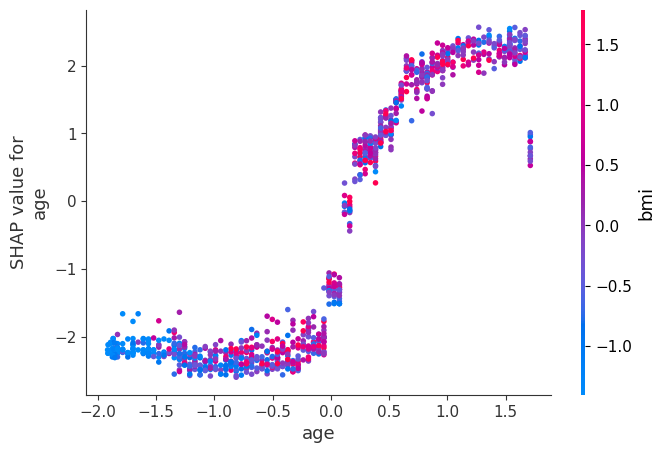

In [124]:
print("--- Dependence Plot (for 'age' with 'bmi' interaction) ---")
shap.dependence_plot("age", shap_values.values, X_test_processed_df, interaction_index="bmi")
plt.show()

This confirms the same strong, positive relationship between age and stroke risk.

The color-coding for bmi (blue vs. pink) shows that at any given age, a higher BMI (pink dots) tends to result in a slightly higher SHAP value (increased risk) compared to a lower BMI (blue dots). This confirms the model is seeing an interaction, where high age combined with high BMI is worse than high age alone.